# Plate Detection

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Read Image

In [18]:
img = cv2.imread("../imgs/car_plate.jpg")

In [3]:
def display(img):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    new_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(new_img)

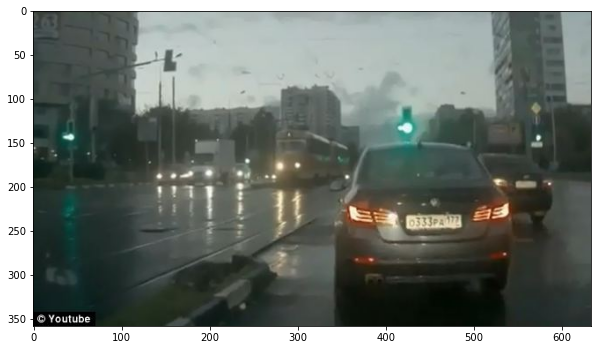

In [4]:
display(img)

#### Load the haarcascade_russian_plate_number.xml file

In [8]:
plate_cascade = cv2.CascadeClassifier("haarcascades/haarcascade_russian_plate_number.xml")

#### A function that takes in an image and draws a rectangle around it detects to be a license plate

In [12]:
def detect_plate(img):
    
    plate_img = img.copy()
    
    plate_rects = plate_cascade.detectMultiScale(plate_img,scaleFactor=1.3, minNeighbors=3)
    
    for (x,y,w,h) in plate_rects:
        cv2.rectangle(plate_img, (x,y), (x+w, y+h), (0,0,255), 4)
        
    
    return plate_img

In [13]:
result = detect_plate(img)

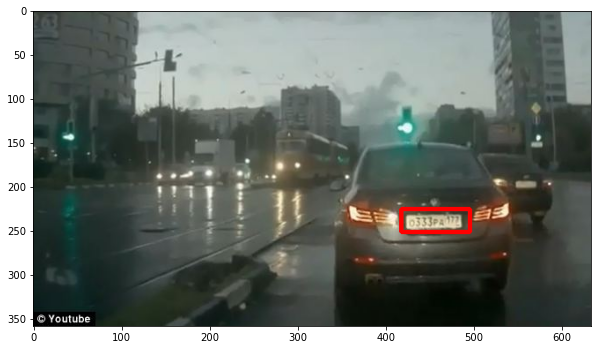

In [14]:
display(result)

#### Blur Plate

In [22]:
def detect_and_blur_plate(img):
    
    plate_img = img.copy()
    roi = img.copy()
    
    plate_rects = plate_cascade.detectMultiScale(plate_img,scaleFactor=1.3,minNeighbors=3)
    
    for (x,y,w,h) in plate_rects:
        
        roi = roi[y:y+h,x:x+w]
        blurred_roi = cv2.medianBlur(roi,7)
        
        plate_img[y:y+h, x:x+w] = blurred_roi
        
    return plate_img

In [23]:
result = detect_and_blur_plate(img)

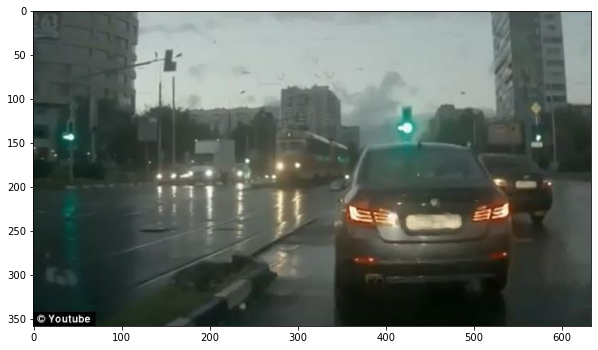

In [24]:
display(result)

## Well Done!